In [15]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as pyplot
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [3]:
sample_path = './data/sample'
train_path = './data/train'
validation_path = './data/validation'
test_path = './data/test'
# dimensions of our images.
img_width, img_height = 150, 150
target_size = (img_width, img_width)
input_shape = (img_width, img_width, 3)

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [4]:
data_gen = ImageDataGenerator(rescale=1. / 255,
                              horizontal_flip=True,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              fill_mode='nearest'
                             )

In [5]:
sample_images = data_gen.flow_from_directory(directory=sample_path, target_size=target_size, class_mode='binary')
train_images = data_gen.flow_from_directory(directory=train_path, target_size=target_size, class_mode='binary')
validation_images = data_gen.flow_from_directory(directory=validation_path, target_size=target_size, class_mode='binary' )

Found 22 images belonging to 2 classes.
Found 17778 images belonging to 2 classes.
Found 7222 images belonging to 2 classes.


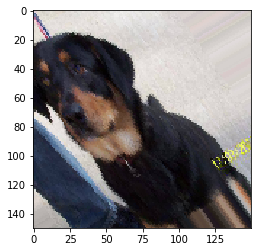

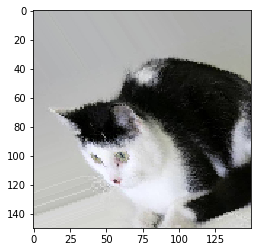

In [6]:
photos = []
for X_batch, y_batch in sample_images:
    i=0
    while i < 2:
        photos.append(X_batch[i])
        pyplot.imshow(X_batch[i])
        pyplot.show()
        i=i+1
    break

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [9]:
history = model.fit_generator(
    train_images,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_images,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
125/125 [==============================] - 50s - loss: 0.7451 - acc: 0.5290 - val_loss: 0.6794 - val_acc: 0.5713
Epoch 2/50
125/125 [==============================] - 49s - loss: 0.6842 - acc: 0.5872 - val_loss: 0.6585 - val_acc: 0.6331
Epoch 3/50
125/125 [==============================] - 50s - loss: 0.6605 - acc: 0.6120 - val_loss: 0.6266 - val_acc: 0.6219
Epoch 4/50
125/125 [==============================] - 50s - loss: 0.6369 - acc: 0.6400 - val_loss: 0.6048 - val_acc: 0.6869
Epoch 5/50
125/125 [==============================] - 50s - loss: 0.6383 - acc: 0.6640 - val_loss: 0.6117 - val_acc: 0.6679
Epoch 6/50
125/125 [==============================] - 50s - loss: 0.6336 - acc: 0.6518 - val_loss: 0.5937 - val_acc: 0.6900
Epoch 7/50
125/125 [==============================] - 50s - loss: 0.6094 - acc: 0.6688 - val_loss: 0.6088 - val_acc: 0.6600
Epoch 8/50
125/125 [==============================] - 50s - loss: 0.6181 - acc: 0.6620 - val_loss: 0.5582 - val_acc: 0.7262
Epoch 9/

In [11]:
model.save('cats-n-dogs_basic_model.h5')

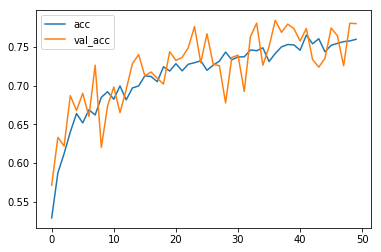

In [17]:
model = load_model('cats-n-dogs_basic_model.h5')
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.legend(['acc', 'val_acc'])
pyplot.show()

In [28]:
def predict(image):
    im_np = np.asarray(image)
    im_array=np.expand_dims(im_np, axis=0) # need to do this since model.predict_classes takes array of images as input
    result = model.predict_classes(im_array)
    if result[0] == 1:
        return 'Dog'
    else:
        return 'Cat'

1/1 [==============================] - 0s
Cat


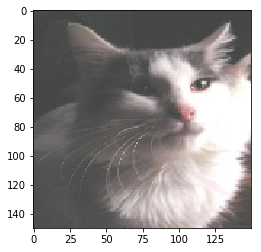

In [29]:
from PIL import Image

image_path = test_path + '/' + '12363.jpg'
pil_im = Image.open(image_path)
im = pil_im.resize((150,150))
pyplot.imshow(im)

print(predict(im))

1/1 [==============================] - 0s
Dog


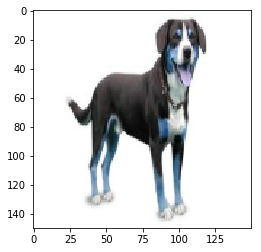

In [30]:
import urllib
import cv2

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.resize(image, (150,150))
    return image

cat_image = 'http://www.ottawafamilyliving.com/wp-content/uploads/2017/05/cat.jpg'
dog_image = 'http://cdn3-www.dogtime.com/assets/uploads/2011/01/file_23262_entlebucher-mountain-dog-300x189.jpg'

image = url_to_image(dog_image)

pyplot.imshow(image)

print(predict(image))